In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'png'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcVXN1YXJpb1xEb2N1bWVudHNcR2l0SHViXC1BcHVudGVzX0Vjb25vbWlhX01hdGVtYXRpY2FcY2FwaXR1bG9z'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\importlib\\_bootstrap.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\importlib\\_bootstrap_external.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\zipimport.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\codecs.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\encodings\\aliases.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\encodings\\_win_cp_codecs.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\encodings\\__init__.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\encodings\\utf_8.py": 1759853796.0, "C:\\Users\\Usuario\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\encodings\\cp1252.py": 1759853796.0, "C:\\Users\\Usuario

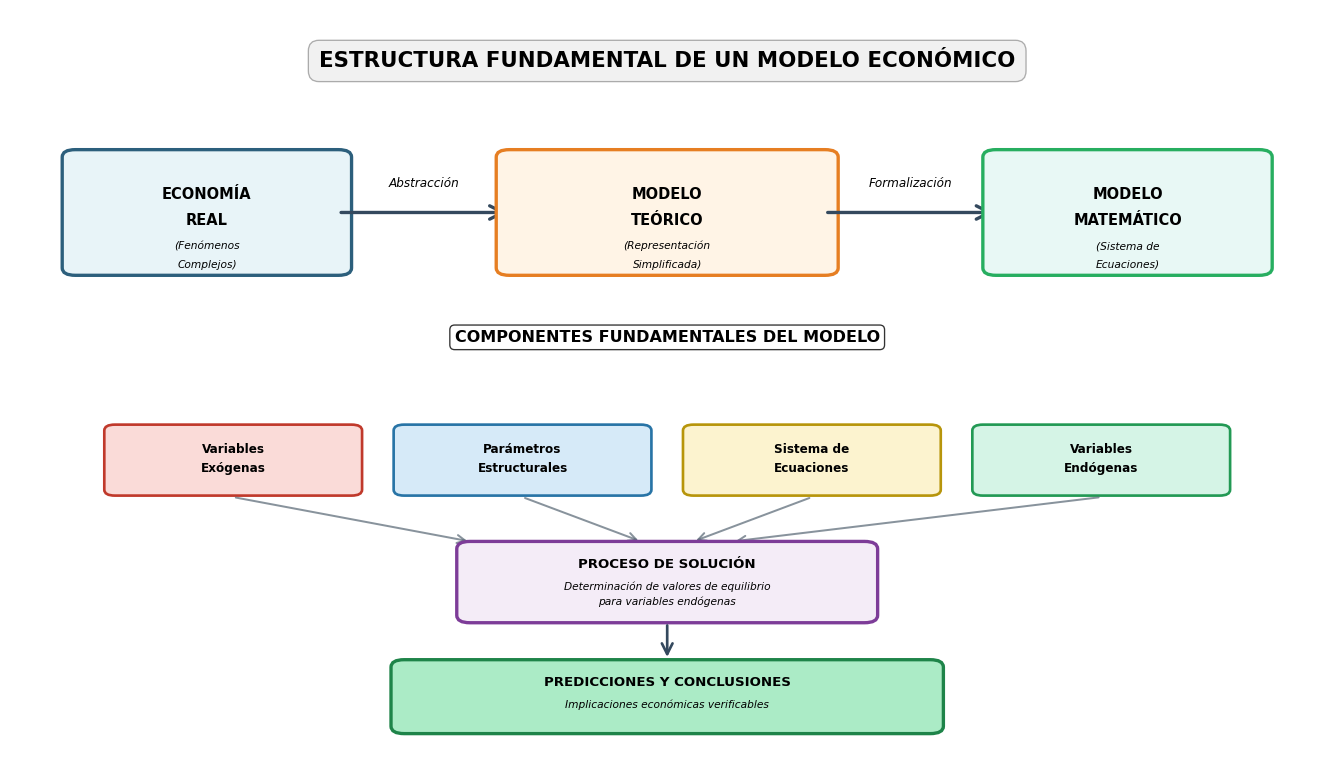

In [2]:
#| label: fig-concepto-modelo
#| fig-cap: Representación esquemática de un modelo económico

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Título principal
ax.text(5, 9.3, 'ESTRUCTURA FUNDAMENTAL DE UN MODELO ECONÓMICO', 
        ha='center', va='center', fontsize=16, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.3))

# Mundo real
real_box = FancyBboxPatch((0.5, 6.5), 2, 1.5, 
                          boxstyle="round,pad=0.1",
                          facecolor='#E8F4F8', 
                          edgecolor='#2C5F7C', linewidth=2.5)
ax.add_patch(real_box)
ax.text(1.5, 7.5, 'ECONOMÍA', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(1.5, 7.15, 'REAL', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(1.5, 6.8, '(Fenómenos', ha='center', va='center', fontsize=8, style='italic')
ax.text(1.5, 6.55, 'Complejos)', ha='center', va='center', fontsize=8, style='italic')

# Proceso de abstracción
arrow1 = FancyArrowPatch((2.5, 7.25), (3.8, 7.25),
                        arrowstyle='->', mutation_scale=25, 
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow1)
ax.text(3.15, 7.6, 'Abstracción', ha='center', fontsize=9, style='italic')

# Modelo teórico
model_box = FancyBboxPatch((3.8, 6.5), 2.4, 1.5,
                          boxstyle="round,pad=0.1",
                          facecolor='#FFF4E6',
                          edgecolor='#E67E22', linewidth=2.5)
ax.add_patch(model_box)
ax.text(5, 7.5, 'MODELO', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(5, 7.15, 'TEÓRICO', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(5, 6.8, '(Representación', ha='center', va='center', fontsize=8, style='italic')
ax.text(5, 6.55, 'Simplificada)', ha='center', va='center', fontsize=8, style='italic')

# Proceso de formalización
arrow2 = FancyArrowPatch((6.2, 7.25), (7.5, 7.25),
                        arrowstyle='->', mutation_scale=25,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow2)
ax.text(6.85, 7.6, 'Formalización', ha='center', fontsize=9, style='italic')

# Modelo matemático
math_box = FancyBboxPatch((7.5, 6.5), 2, 1.5,
                         boxstyle="round,pad=0.1",
                         facecolor='#E8F8F5',
                         edgecolor='#27AE60', linewidth=2.5)
ax.add_patch(math_box)
ax.text(8.5, 7.5, 'MODELO', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(8.5, 7.15, 'MATEMÁTICO', ha='center', va='center', fontsize=11, fontweight='bold')
ax.text(8.5, 6.8, '(Sistema de', ha='center', va='center', fontsize=8, style='italic')
ax.text(8.5, 6.55, 'Ecuaciones)', ha='center', va='center', fontsize=8, style='italic')

# Componentes del modelo
components_y = 5.2
ax.text(5, components_y + 0.3, 'COMPONENTES FUNDAMENTALES DEL MODELO', 
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Variables exógenas
var_exog = FancyBboxPatch((0.8, 3.5), 1.8, 0.8,
                          boxstyle="round,pad=0.08",
                          facecolor='#FADBD8',
                          edgecolor='#C0392B', linewidth=2)
ax.add_patch(var_exog)
ax.text(1.7, 4, 'Variables', ha='center', fontsize=9, fontweight='bold')
ax.text(1.7, 3.75, 'Exógenas', ha='center', fontsize=9, fontweight='bold')

# Parámetros
params = FancyBboxPatch((3, 3.5), 1.8, 0.8,
                       boxstyle="round,pad=0.08",
                       facecolor='#D6EAF8',
                       edgecolor='#2874A6', linewidth=2)
ax.add_patch(params)
ax.text(3.9, 4, 'Parámetros', ha='center', fontsize=9, fontweight='bold')
ax.text(3.9, 3.75, 'Estructurales', ha='center', fontsize=9, fontweight='bold')

# Ecuaciones
equations = FancyBboxPatch((5.2, 3.5), 1.8, 0.8,
                          boxstyle="round,pad=0.08",
                          facecolor='#FCF3CF',
                          edgecolor='#B7950B', linewidth=2)
ax.add_patch(equations)
ax.text(6.1, 4, 'Sistema de', ha='center', fontsize=9, fontweight='bold')
ax.text(6.1, 3.75, 'Ecuaciones', ha='center', fontsize=9, fontweight='bold')

# Variables endógenas
var_endog = FancyBboxPatch((7.4, 3.5), 1.8, 0.8,
                          boxstyle="round,pad=0.08",
                          facecolor='#D5F4E6',
                          edgecolor='#229954', linewidth=2)
ax.add_patch(var_endog)
ax.text(8.3, 4, 'Variables', ha='center', fontsize=9, fontweight='bold')
ax.text(8.3, 3.75, 'Endógenas', ha='center', fontsize=9, fontweight='bold')

# Flechas de relación entre componentes
arrow_comp1 = FancyArrowPatch((1.7, 3.4), (3.5, 2.8),
                             arrowstyle='->', mutation_scale=15,
                             linewidth=1.5, color='#566573', alpha=0.7)
ax.add_patch(arrow_comp1)

arrow_comp2 = FancyArrowPatch((3.9, 3.4), (4.8, 2.8),
                             arrowstyle='->', mutation_scale=15,
                             linewidth=1.5, color='#566573', alpha=0.7)
ax.add_patch(arrow_comp2)

arrow_comp3 = FancyArrowPatch((6.1, 3.4), (5.2, 2.8),
                             arrowstyle='->', mutation_scale=15,
                             linewidth=1.5, color='#566573', alpha=0.7)
ax.add_patch(arrow_comp3)

arrow_comp4 = FancyArrowPatch((8.3, 3.4), (5.5, 2.8),
                             arrowstyle='->', mutation_scale=15,
                             linewidth=1.5, color='#566573', alpha=0.7)
ax.add_patch(arrow_comp4)

# Proceso de solución
solution_box = FancyBboxPatch((3.5, 1.8), 3, 0.9,
                             boxstyle="round,pad=0.1",
                             facecolor='#F4ECF7',
                             edgecolor='#7D3C98', linewidth=2.5)
ax.add_patch(solution_box)
ax.text(5, 2.45, 'PROCESO DE SOLUCIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(5, 2.15, 'Determinación de valores de equilibrio', ha='center', fontsize=8, style='italic')
ax.text(5, 1.95, 'para variables endógenas', ha='center', fontsize=8, style='italic')

# Resultados
arrow_result = FancyArrowPatch((5, 1.7), (5, 1.2),
                              arrowstyle='->', mutation_scale=20,
                              linewidth=2, color='#34495E')
ax.add_patch(arrow_result)

result_box = FancyBboxPatch((3, 0.3), 4, 0.8,
                           boxstyle="round,pad=0.1",
                           facecolor='#ABEBC6',
                           edgecolor='#1E8449', linewidth=2.5)
ax.add_patch(result_box)
ax.text(5, 0.85, 'PREDICCIONES Y CONCLUSIONES', ha='center', fontsize=10, fontweight='bold')
ax.text(5, 0.55, 'Implicaciones económicas verificables', ha='center', fontsize=8, style='italic')

plt.tight_layout()
plt.show()

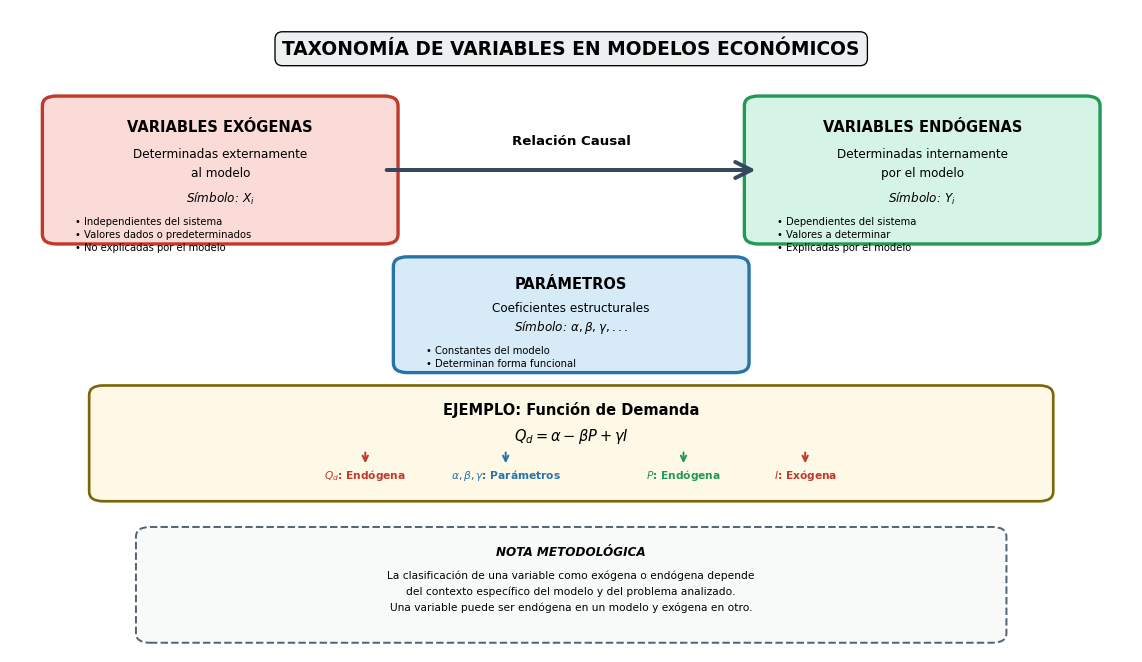

In [3]:
#| label: fig-taxonomia-variables
#| fig-cap: Clasificación y relaciones entre tipos de variables

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch, FancyArrowPatch

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Título
ax.text(6, 9.3, 'TAXONOMÍA DE VARIABLES EN MODELOS ECONÓMICOS', 
        ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='#ECF0F1'))

# Variables exógenas
exog_box = FancyBboxPatch((0.5, 6.5), 3.5, 2,
                          boxstyle="round,pad=0.15",
                          facecolor='#FADBD8',
                          edgecolor='#C0392B', linewidth=2.5)
ax.add_patch(exog_box)
ax.text(2.25, 8.1, 'VARIABLES EXÓGENAS', ha='center', fontsize=11, fontweight='bold')
ax.text(2.25, 7.7, 'Determinadas externamente', ha='center', fontsize=9)
ax.text(2.25, 7.4, 'al modelo', ha='center', fontsize=9)
ax.text(2.25, 7, 'Símbolo: $X_i$', ha='center', fontsize=9, style='italic')

# Características exógenas
ax.text(0.7, 6.65, '• Independientes del sistema', fontsize=7.5, ha='left')
ax.text(0.7, 6.45, '• Valores dados o predeterminados', fontsize=7.5, ha='left')
ax.text(0.7, 6.25, '• No explicadas por el modelo', fontsize=7.5, ha='left')

# Variables endógenas
endog_box = FancyBboxPatch((8, 6.5), 3.5, 2,
                           boxstyle="round,pad=0.15",
                           facecolor='#D5F4E6',
                           edgecolor='#229954', linewidth=2.5)
ax.add_patch(endog_box)
ax.text(9.75, 8.1, 'VARIABLES ENDÓGENAS', ha='center', fontsize=11, fontweight='bold')
ax.text(9.75, 7.7, 'Determinadas internamente', ha='center', fontsize=9)
ax.text(9.75, 7.4, 'por el modelo', ha='center', fontsize=9)
ax.text(9.75, 7, 'Símbolo: $Y_i$', ha='center', fontsize=9, style='italic')

# Características endógenas
ax.text(8.2, 6.65, '• Dependientes del sistema', fontsize=7.5, ha='left')
ax.text(8.2, 6.45, '• Valores a determinar', fontsize=7.5, ha='left')
ax.text(8.2, 6.25, '• Explicadas por el modelo', fontsize=7.5, ha='left')

# Flecha de relación causal
arrow_causal = FancyArrowPatch((4, 7.5), (8, 7.5),
                              arrowstyle='->', mutation_scale=30,
                              linewidth=3, color='#34495E')
ax.add_patch(arrow_causal)
ax.text(6, 7.9, 'Relación Causal', ha='center', fontsize=10, fontweight='bold')

# Parámetros
param_box = FancyBboxPatch((4.25, 4.5), 3.5, 1.5,
                          boxstyle="round,pad=0.15",
                          facecolor='#D6EAF8',
                          edgecolor='#2874A6', linewidth=2.5)
ax.add_patch(param_box)
ax.text(6, 5.65, 'PARÁMETROS', ha='center', fontsize=11, fontweight='bold')
ax.text(6, 5.3, 'Coeficientes estructurales', ha='center', fontsize=9)
ax.text(6, 5, 'Símbolo: $\\alpha, \\beta, \\gamma, ...$', ha='center', fontsize=9, style='italic')
ax.text(4.45, 4.65, '• Constantes del modelo', fontsize=7.5, ha='left')
ax.text(4.45, 4.45, '• Determinan forma funcional', fontsize=7.5, ha='left')

# Ejemplo funcional
example_box = FancyBboxPatch((1, 2.5), 10, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#FEF9E7',
                            edgecolor='#7D6608', linewidth=2)
ax.add_patch(example_box)
ax.text(6, 3.7, 'EJEMPLO: Función de Demanda', ha='center', fontsize=11, fontweight='bold')
ax.text(6, 3.3, '$Q_d = \\alpha - \\beta P + \\gamma I$', ha='center', fontsize=11)

# Anotaciones del ejemplo
ax.annotate('', xy=(3.8, 2.9), xytext=(3.8, 3.15),
           arrowprops=dict(arrowstyle='->', lw=1.5, color='#C0392B'))
ax.text(3.8, 2.7, '$Q_d$: Endógena', ha='center', fontsize=8, color='#C0392B', fontweight='bold')

ax.annotate('', xy=(5.3, 2.9), xytext=(5.3, 3.15),
           arrowprops=dict(arrowstyle='->', lw=1.5, color='#2874A6'))
ax.text(5.3, 2.7, '$\\alpha, \\beta, \\gamma$: Parámetros', ha='center', fontsize=8, color='#2874A6', fontweight='bold')

ax.annotate('', xy=(7.2, 2.9), xytext=(7.2, 3.15),
           arrowprops=dict(arrowstyle='->', lw=1.5, color='#229954'))
ax.text(7.2, 2.7, '$P$: Endógena', ha='center', fontsize=8, color='#229954', fontweight='bold')

ax.annotate('', xy=(8.5, 2.9), xytext=(8.5, 3.15),
           arrowprops=dict(arrowstyle='->', lw=1.5, color='#C0392B'))
ax.text(8.5, 2.7, '$I$: Exógena', ha='center', fontsize=8, color='#C0392B', fontweight='bold')

# Nota metodológica
note_box = FancyBboxPatch((1.5, 0.3), 9, 1.5,
                         boxstyle="round,pad=0.15",
                         facecolor='#F8F9F9',
                         edgecolor='#566573', linewidth=1.5,
                         linestyle='--')
ax.add_patch(note_box)
ax.text(6, 1.5, 'NOTA METODOLÓGICA', ha='center', fontsize=9, fontweight='bold', style='italic')
ax.text(6, 1.15, 'La clasificación de una variable como exógena o endógena depende', ha='center', fontsize=8)
ax.text(6, 0.9, 'del contexto específico del modelo y del problema analizado.', ha='center', fontsize=8)
ax.text(6, 0.65, 'Una variable puede ser endógena en un modelo y exógena en otro.', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

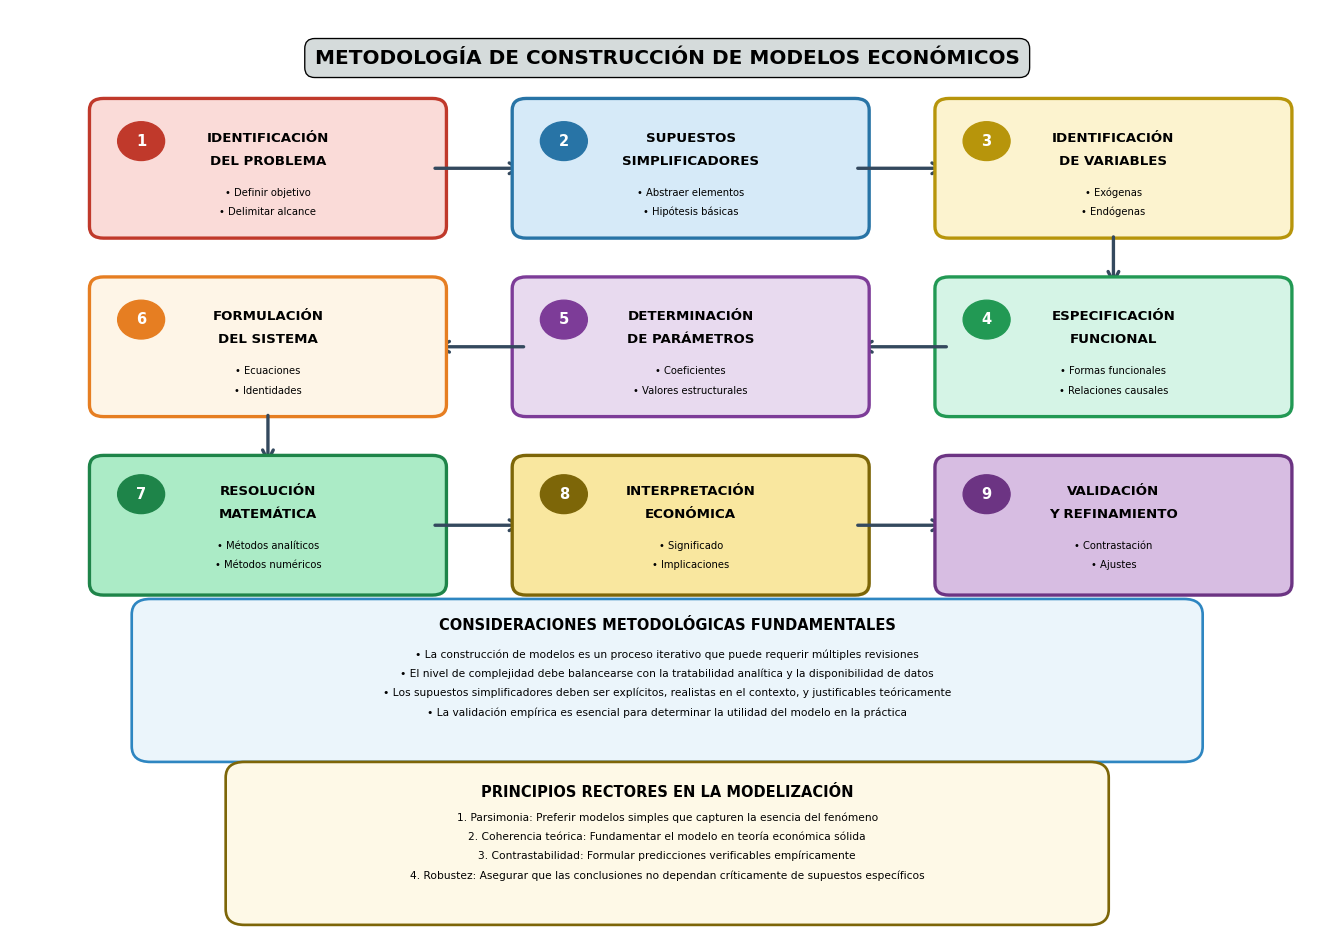

In [4]:
#| label: fig-metodologia-construccion
#| fig-cap: Proceso sistemático de construcción de un modelo económico

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle
import numpy as np

fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 14)
ax.set_ylim(0, 12)
ax.axis('off')

# Título
ax.text(7, 11.3, 'METODOLOGÍA DE CONSTRUCCIÓN DE MODELOS ECONÓMICOS', 
        ha='center', fontsize=15, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#D5DBDB'))

# Etapa 1: Identificación del problema
stage1_box = FancyBboxPatch((1, 9.2), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#FADBD8',
                            edgecolor='#C0392B', linewidth=2.5)
ax.add_patch(stage1_box)
circle1 = Circle((1.4, 10.3), 0.25, color='#C0392B')
ax.add_patch(circle1)
ax.text(1.4, 10.3, '1', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(2.75, 10.3, 'IDENTIFICACIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(2.75, 10, 'DEL PROBLEMA', ha='center', fontsize=10, fontweight='bold')
ax.text(2.75, 9.6, '• Definir objetivo', fontsize=7.5, ha='center')
ax.text(2.75, 9.35, '• Delimitar alcance', fontsize=7.5, ha='center')

arrow1 = FancyArrowPatch((4.5, 9.95), (5.5, 9.95),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow1)

# Etapa 2: Supuestos simplificadores
stage2_box = FancyBboxPatch((5.5, 9.2), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#D6EAF8',
                            edgecolor='#2874A6', linewidth=2.5)
ax.add_patch(stage2_box)
circle2 = Circle((5.9, 10.3), 0.25, color='#2874A6')
ax.add_patch(circle2)
ax.text(5.9, 10.3, '2', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(7.25, 10.3, 'SUPUESTOS', ha='center', fontsize=10, fontweight='bold')
ax.text(7.25, 10, 'SIMPLIFICADORES', ha='center', fontsize=10, fontweight='bold')
ax.text(7.25, 9.6, '• Abstraer elementos', fontsize=7.5, ha='center')
ax.text(7.25, 9.35, '• Hipótesis básicas', fontsize=7.5, ha='center')

arrow2 = FancyArrowPatch((9, 9.95), (10, 9.95),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow2)

# Etapa 3: Identificación de variables
stage3_box = FancyBboxPatch((10, 9.2), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#FCF3CF',
                            edgecolor='#B7950B', linewidth=2.5)
ax.add_patch(stage3_box)
circle3 = Circle((10.4, 10.3), 0.25, color='#B7950B')
ax.add_patch(circle3)
ax.text(10.4, 10.3, '3', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(11.75, 10.3, 'IDENTIFICACIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(11.75, 10, 'DE VARIABLES', ha='center', fontsize=10, fontweight='bold')
ax.text(11.75, 9.6, '• Exógenas', fontsize=7.5, ha='center')
ax.text(11.75, 9.35, '• Endógenas', fontsize=7.5, ha='center')

# Flecha hacia abajo
arrow3 = FancyArrowPatch((11.75, 9.1), (11.75, 8.4),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow3)

# Etapa 4: Especificación funcional
stage4_box = FancyBboxPatch((10, 6.9), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#D5F4E6',
                            edgecolor='#229954', linewidth=2.5)
ax.add_patch(stage4_box)
circle4 = Circle((10.4, 8), 0.25, color='#229954')
ax.add_patch(circle4)
ax.text(10.4, 8, '4', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(11.75, 8, 'ESPECIFICACIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(11.75, 7.7, 'FUNCIONAL', ha='center', fontsize=10, fontweight='bold')
ax.text(11.75, 7.3, '• Formas funcionales', fontsize=7.5, ha='center')
ax.text(11.75, 7.05, '• Relaciones causales', fontsize=7.5, ha='center')

arrow4 = FancyArrowPatch((10, 7.65), (9, 7.65),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow4)

# Etapa 5: Parámetros
stage5_box = FancyBboxPatch((5.5, 6.9), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#E8DAEF',
                            edgecolor='#7D3C98', linewidth=2.5)
ax.add_patch(stage5_box)
circle5 = Circle((5.9, 8), 0.25, color='#7D3C98')
ax.add_patch(circle5)
ax.text(5.9, 8, '5', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(7.25, 8, 'DETERMINACIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(7.25, 7.7, 'DE PARÁMETROS', ha='center', fontsize=10, fontweight='bold')
ax.text(7.25, 7.3, '• Coeficientes', fontsize=7.5, ha='center')
ax.text(7.25, 7.05, '• Valores estructurales', fontsize=7.5, ha='center')

arrow5 = FancyArrowPatch((5.5, 7.65), (4.5, 7.65),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow5)

# Etapa 6: Sistema de ecuaciones
stage6_box = FancyBboxPatch((1, 6.9), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#FEF5E7',
                            edgecolor='#E67E22', linewidth=2.5)
ax.add_patch(stage6_box)
circle6 = Circle((1.4, 8), 0.25, color='#E67E22')
ax.add_patch(circle6)
ax.text(1.4, 8, '6', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(2.75, 8, 'FORMULACIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(2.75, 7.7, 'DEL SISTEMA', ha='center', fontsize=10, fontweight='bold')
ax.text(2.75, 7.3, '• Ecuaciones', fontsize=7.5, ha='center')
ax.text(2.75, 7.05, '• Identidades', fontsize=7.5, ha='center')

# Flecha hacia abajo
arrow6 = FancyArrowPatch((2.75, 6.8), (2.75, 6.1),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow6)

# Etapa 7: Resolución
stage7_box = FancyBboxPatch((1, 4.6), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#ABEBC6',
                            edgecolor='#1E8449', linewidth=2.5)
ax.add_patch(stage7_box)
circle7 = Circle((1.4, 5.75), 0.25, color='#1E8449')
ax.add_patch(circle7)
ax.text(1.4, 5.75, '7', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(2.75, 5.75, 'RESOLUCIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(2.75, 5.45, 'MATEMÁTICA', ha='center', fontsize=10, fontweight='bold')
ax.text(2.75, 5.05, '• Métodos analíticos', fontsize=7.5, ha='center')
ax.text(2.75, 4.8, '• Métodos numéricos', fontsize=7.5, ha='center')

arrow7 = FancyArrowPatch((4.5, 5.35), (5.5, 5.35),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow7)

# Etapa 8: Interpretación
stage8_box = FancyBboxPatch((5.5, 4.6), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#F9E79F',
                            edgecolor='#7D6608', linewidth=2.5)
ax.add_patch(stage8_box)
circle8 = Circle((5.9, 5.75), 0.25, color='#7D6608')
ax.add_patch(circle8)
ax.text(5.9, 5.75, '8', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(7.25, 5.75, 'INTERPRETACIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(7.25, 5.45, 'ECONÓMICA', ha='center', fontsize=10, fontweight='bold')
ax.text(7.25, 5.05, '• Significado', fontsize=7.5, ha='center')
ax.text(7.25, 4.8, '• Implicaciones', fontsize=7.5, ha='center')

arrow8 = FancyArrowPatch((9, 5.35), (10, 5.35),
                        arrowstyle='->', mutation_scale=20,
                        linewidth=2.5, color='#34495E')
ax.add_patch(arrow8)

# Etapa 9: Validación
stage9_box = FancyBboxPatch((10, 4.6), 3.5, 1.5,
                            boxstyle="round,pad=0.15",
                            facecolor='#D7BDE2',
                            edgecolor='#6C3483', linewidth=2.5)
ax.add_patch(stage9_box)
circle9 = Circle((10.4, 5.75), 0.25, color='#6C3483')
ax.add_patch(circle9)
ax.text(10.4, 5.75, '9', ha='center', va='center', fontsize=11, fontweight='bold', color='white')
ax.text(11.75, 5.75, 'VALIDACIÓN', ha='center', fontsize=10, fontweight='bold')
ax.text(11.75, 5.45, 'Y REFINAMIENTO', ha='center', fontsize=10, fontweight='bold')
ax.text(11.75, 5.05, '• Contrastación', fontsize=7.5, ha='center')
ax.text(11.75, 4.8, '• Ajustes', fontsize=7.5, ha='center')

# Cuadro de consideraciones
considerations_box = FancyBboxPatch((1.5, 2.5), 11, 1.7,
                                   boxstyle="round,pad=0.2",
                                   facecolor='#EBF5FB',
                                   edgecolor='#2E86C1', linewidth=2)
ax.add_patch(considerations_box)
ax.text(7, 4, 'CONSIDERACIONES METODOLÓGICAS FUNDAMENTALES', ha='center', 
        fontsize=11, fontweight='bold')
ax.text(7, 3.65, '• La construcción de modelos es un proceso iterativo que puede requerir múltiples revisiones', 
        ha='center', fontsize=8)
ax.text(7, 3.4, '• El nivel de complejidad debe balancearse con la tratabilidad analítica y la disponibilidad de datos', 
        ha='center', fontsize=8)
ax.text(7, 3.15, '• Los supuestos simplificadores deben ser explícitos, realistas en el contexto, y justificables teóricamente', 
        ha='center', fontsize=8)
ax.text(7, 2.9, '• La validación empírica es esencial para determinar la utilidad del modelo en la práctica', 
        ha='center', fontsize=8)

# Principios guía
principles_box = FancyBboxPatch((2.5, 0.4), 9, 1.7,
                               boxstyle="round,pad=0.2",
                               facecolor='#FEF9E7',
                               edgecolor='#7D6608', linewidth=2)
ax.add_patch(principles_box)
ax.text(7, 1.85, 'PRINCIPIOS RECTORES EN LA MODELIZACIÓN', ha='center', 
        fontsize=11, fontweight='bold')
ax.text(7, 1.55, '1. Parsimonia: Preferir modelos simples que capturen la esencia del fenómeno', 
        ha='center', fontsize=8)
ax.text(7, 1.3, '2. Coherencia teórica: Fundamentar el modelo en teoría económica sólida', 
        ha='center', fontsize=8)
ax.text(7, 1.05, '3. Contrastabilidad: Formular predicciones verificables empíricamente', 
        ha='center', fontsize=8)
ax.text(7, 0.8, '4. Robustez: Asegurar que las conclusiones no dependan críticamente de supuestos específicos', 
        ha='center', fontsize=8)

plt.tight_layout()
plt.show()

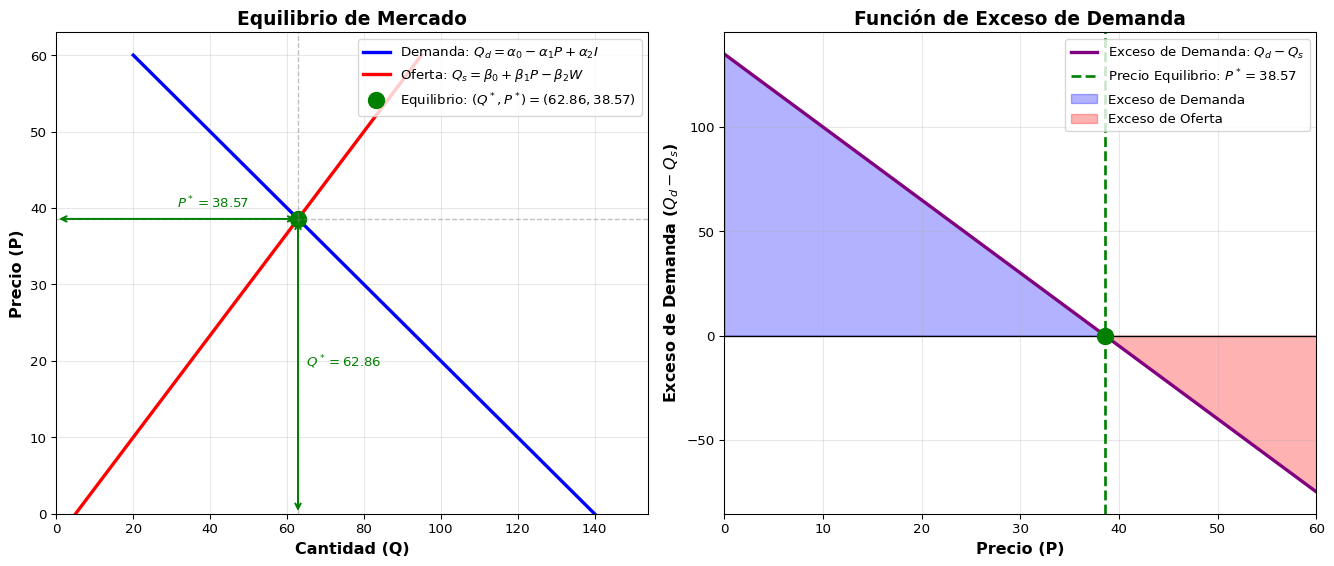

SOLUCIÓN DEL MODELO DE EQUILIBRIO DE MERCADO

Parámetros del modelo:
  Demanda: α₀ = 100, α₁ = 2, α₂ = 0.5
  Oferta:  β₀ = 20, β₁ = 1.5, β₂ = 0.3
  Variables exógenas: I = 80, W = 50

Equilibrio de mercado:
  Precio de equilibrio (P*):    38.5714
  Cantidad de equilibrio (Q*):  62.8571

Verificación:
  Q_d(P*) = 62.8571
  Q_s(P*) = 62.8571
  Diferencia: 0.0000000000


In [5]:
#| label: fig-equilibrio-mercado
#| fig-cap: 'Equilibrio de mercado: Intersección de oferta y demanda'

import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
alpha_0, alpha_1, alpha_2 = 100, 2, 0.5
beta_0, beta_1, beta_2 = 20, 1.5, 0.3
I = 80  # Ingreso
W = 50  # Costo insumos

# Cálculo del equilibrio
P_eq = (alpha_0 - beta_0 + alpha_2 * I + beta_2 * W) / (alpha_1 + beta_1)
Q_eq = alpha_0 - alpha_1 * P_eq + alpha_2 * I

# Rango de precios para graficar
P_range = np.linspace(0, 60, 200)

# Funciones de demanda y oferta
Q_d = alpha_0 - alpha_1 * P_range + alpha_2 * I
Q_s = beta_0 + beta_1 * P_range - beta_2 * W

# Crear figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Equilibrio de mercado
ax1.plot(Q_d, P_range, 'b-', linewidth=2.5, label='Demanda: $Q_d = \\alpha_0 - \\alpha_1 P + \\alpha_2 I$')
ax1.plot(Q_s, P_range, 'r-', linewidth=2.5, label='Oferta: $Q_s = \\beta_0 + \\beta_1 P - \\beta_2 W$')
ax1.plot(Q_eq, P_eq, 'go', markersize=12, label=f'Equilibrio: $(Q^*, P^*) = ({Q_eq:.2f}, {P_eq:.2f})$')

# Líneas punteadas al equilibrio
ax1.axhline(y=P_eq, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax1.axvline(x=Q_eq, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Anotaciones
ax1.annotate('', xy=(Q_eq, 0), xytext=(Q_eq, P_eq),
            arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))
ax1.text(Q_eq + 2, P_eq/2, f'$Q^* = {Q_eq:.2f}$', fontsize=10, color='green', fontweight='bold')

ax1.annotate('', xy=(0, P_eq), xytext=(Q_eq, P_eq),
            arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))
ax1.text(Q_eq/2, P_eq + 1.5, f'$P^* = {P_eq:.2f}$', fontsize=10, color='green', fontweight='bold')

ax1.set_xlabel('Cantidad (Q)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Precio (P)', fontsize=12, fontweight='bold')
ax1.set_title('Equilibrio de Mercado', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, max(Q_d[0], Q_s[-1]) * 1.1)
ax1.set_ylim(0, max(P_range) * 1.05)

# Gráfico 2: Exceso de demanda/oferta
excess_demand = (alpha_0 - alpha_1 * P_range + alpha_2 * I) - (beta_0 + beta_1 * P_range - beta_2 * W)

ax2.plot(P_range, excess_demand, 'purple', linewidth=2.5, label='Exceso de Demanda: $Q_d - Q_s$')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.axvline(x=P_eq, color='green', linestyle='--', linewidth=2, label=f'Precio Equilibrio: $P^* = {P_eq:.2f}$')
ax2.plot(P_eq, 0, 'go', markersize=12)

# Zonas de exceso
ax2.fill_between(P_range, 0, excess_demand, where=(excess_demand > 0), 
                 alpha=0.3, color='blue', label='Exceso de Demanda')
ax2.fill_between(P_range, 0, excess_demand, where=(excess_demand < 0), 
                 alpha=0.3, color='red', label='Exceso de Oferta')

ax2.set_xlabel('Precio (P)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Exceso de Demanda ($Q_d - Q_s$)', fontsize=12, fontweight='bold')
ax2.set_title('Función de Exceso de Demanda', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, max(P_range))

plt.tight_layout()
plt.show()

# Imprimir resultados
print("=" * 60)
print("SOLUCIÓN DEL MODELO DE EQUILIBRIO DE MERCADO")
print("=" * 60)
print(f"\nParámetros del modelo:")
print(f"  Demanda: α₀ = {alpha_0}, α₁ = {alpha_1}, α₂ = {alpha_2}")
print(f"  Oferta:  β₀ = {beta_0}, β₁ = {beta_1}, β₂ = {beta_2}")
print(f"  Variables exógenas: I = {I}, W = {W}")
print(f"\nEquilibrio de mercado:")
print(f"  Precio de equilibrio (P*):    {P_eq:.4f}")
print(f"  Cantidad de equilibrio (Q*):  {Q_eq:.4f}")
print(f"\nVerificación:")
print(f"  Q_d(P*) = {alpha_0 - alpha_1 * P_eq + alpha_2 * I:.4f}")
print(f"  Q_s(P*) = {beta_0 + beta_1 * P_eq - beta_2 * W:.4f}")
print(f"  Diferencia: {abs((alpha_0 - alpha_1 * P_eq + alpha_2 * I) - (beta_0 + beta_1 * P_eq - beta_2 * W)):.10f}")
print("=" * 60)